<h1 style="color:blue">Thèses et mémoires du Québec</h1>
### Quelques données sur les doctorats et maîtrises publiés dans les universités québécoises depuis les années 1970

----

#### *Data on theses and dissertations published in Québec universities in the last 50 years*

In [1]:
%matplotlib inline
import csv, re, random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

-----
On commence par demander à **pandas** d'avaler le fichier CSV qui contient toutes nos données et de les placer dans la variable `theses`.

In [2]:
theses = pd.read_csv("THESES-TOTAL.csv")

-----
On fait ensuite, toujours grâce à pandas, une première analyse rapide du nombre de pages selon le type de document (doctorat ou maîtrise). Tout de suite, on a:

- le nombre total de documents dans chacun de ces deux types
- les valeurs extrêmes (min et max)
- la moyenne et la médiane (50%)
- une idée de la distribution du nombre de pages par quartile

In [3]:
parType = theses.groupby("type").nbPages
parType.describe()

type           
doctorat  count    16175.000000
          mean       251.200000
          std        117.811595
          min         34.000000
          25%        172.000000
          50%        226.000000
          75%        303.000000
          max       1578.000000
maîtrise  count    43541.000000
          mean       134.424313
          std         55.511239
          min         19.000000
          25%         98.000000
          50%        125.000000
          75%        159.000000
          max        776.000000
dtype: float64

-----
On demande ensuite à **matplotlib** de faire un premier graphique. C'est un histogramme de la distribution du nombre de pages des maîtrises et doctorats par tranche de 10 pages, puisqu'on fait 50 colonnes (*«bins»*) dans un intervalle (*«range»*) qui va de 10 à 510. Le paramètre `alpha` indique que les colonnes auront une transparence de 50%.

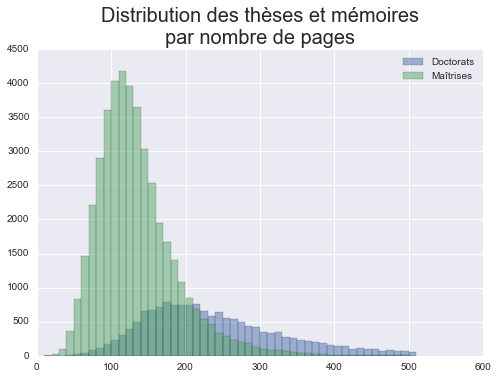

In [4]:
parType.hist(bins=50,histtype="bar",range=(10,510), alpha=0.5)
plt.legend(["Doctorats","Maîtrises"])
plt.title("Distribution des thèses et mémoires\npar nombre de pages",size=20)

-----

## Les doctorats

-----

Commençons par analyser seulement les doctorats en les regroupant tous dans une variable du même nom. Pandas peut nous décrire quelques-unes des données contenues dans ce sous-ensemble:

- l'année à laquelle le doctorat a été déposé
- son nombre de pages
- la longueur de son titre

In [5]:
doctorats = theses.query("type == 'doctorat'")
doctorats.describe()

,annee,nbPages,longTitre
count,16175.000000,16175.000000,16175.000000
mean,2006.596662,251.200000,105.367728
std,9.254433,117.811595,41.261663
min,1966.000000,34.000000,14.000000
25%,2004.000000,172.000000,76.000000
50%,2010.000000,226.000000,100.000000
75%,2013.000000,303.000000,129.000000
max,2016.000000,1578.000000,378.000000


-----
C'est bien d'avoir des données sur l'ensemble des doctorats au Québec. Mais je suis curieux de savoir comment le nombre de pages de ces doctorats varie en fonction de l'université dans laquelle ils ont été réalisés.

Pandas nous aide ici encore en permettant d'effectuer un regroupement par université que j'ai placé dans une variable appelée `doctoratsUniv`.

In [6]:
doctoratsUniv = doctorats.groupby("universite")
doctoratsUniv.describe()

annee    longTitre      nbPages
universite                                                           
Concordia                count  2162.000000  2162.000000  2162.000000
                         mean   2004.987974    89.526364   230.700278
                         std       7.950381    34.425079    97.808660
                         min    1972.000000    14.000000    61.000000
                         25%    1999.000000    64.000000   162.000000
                         50%    2007.000000    85.000000   210.500000
                         75%    2012.000000   108.000000   276.750000
                         max    2015.000000   261.000000  1112.000000
HEC Montréal             count   304.000000   304.000000   304.000000
                         mean   2005.072368    92.697368   262.460526
                         std       8.129401    37.823551   147.050602
                         min    1970.000000    26.000000    61.000000
                         25%    2001.000000    62.000000   157.750000
                         50%    2007.000000    89.000000   226.000000
                         75%    2012.000000   118.000000   340.250000
                         max    2016.000000   212.000000  1430.000000
INRS                     count   506.000000   506.000000   506.000000
                         mean   2007.750988   122.173913   246.189723
                         std       6.281298    40.401272    88.376734
                         min    1986.000000    37.000000    87.000000
                         25%    2004.000000    94.250000   182.250000
                         50%    2009.000000   117.000000   231.500000
                         75%    2013.000000   146.000000   292.000000
                         max    2016.000000   303.000000   682.000000
McGill                   count  2665.000000  2665.000000  2665.000000
                         mean   1997.303940    86.746341   252.076173
                         std      14.148104    34.138719   113.549763
                         min    1966.000000    14.000000    34.000000
                         25%    1987.000000    62.000000   182.000000
                         50%    2000.000000    83.000000   228.000000
...                                     ...          ...          ...
Université Laval         std       3.235148    41.835292   120.192935
                         min    2002.000000    14.000000    36.000000
                         25%    2008.000000    84.000000   174.000000
                         50%    2011.000000   109.000000   232.000000
                         75%    2014.000000   137.000000   310.500000
                         max    2016.000000   378.000000  1478.000000
Université de Montréal   count  2676.000000  2676.000000  2676.000000
                         mean   2009.778774   109.508595   282.806801
                         std       4.929902    38.674693   121.275155
                         min    1970.000000    21.000000    49.000000
                         25%    2008.000000    81.000000   201.000000
                         50%    2010.000000   107.000000   259.000000
                         75%    2013.000000   135.000000   337.250000
                         max    2015.000000   259.000000  1578.000000
Université de Sherbrooke count  1728.000000  1728.000000  1728.000000
                         mean   2008.038773   117.899306   234.346065
                         std       5.933740    43.135735   105.779646
                         min    1975.000000    21.000000    46.000000
                         25%    2004.000000    88.000000   163.000000
                         50%    2009.000000   111.000000   208.000000
                         75%    2013.000000   142.000000   276.000000
                         max    2016.000000   351.000000   826.000000
École Polytechnique      count   576.000000   576.000000   576.000000
                         mean   2012.612847    96.097222   201.854167
                         std       1.856910    3

-----
Classons maintenant les universités en fonction du nombre médian de pages de leurs doctorats, exercice intéressant en soi qui sera également utile pour l'étape suivante.

In [7]:
medianesDoctoratsUniv = doctoratsUniv["nbPages"].median().sort_values(ascending=False)
medianesDoctoratsUniv

universite
UQAM                        269.0
Université de Montréal      259.0
UQAC                        242.5
UQO                         238.5
UQAT                        238.5
Université Laval            232.0
INRS                        231.5
McGill                      228.0
HEC Montréal                226.0
Concordia                   210.5
Université de Sherbrooke    208.0
École Polytechnique         186.0
UQTR                        145.0
Name: nbPages, dtype: float64

-----
Pour illustrer la distribution du nombre de pages des doctorats par université, le meilleur type de graphique est peut-être le *box&nbsp;plot*, qu'on peut traduire par **diagramme de quartiles**... ou ce que les Français ont baptisé des [boîtes à moustaches](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches).
![](http://www.statcan.gc.ca/edu/power-pouvoir/ch12/img/5214889_02-fra.gif)
Ces boîtes permettent d'afficher une distribution qui a été découpée en quartiles.<br>
Les deuxième et troisième quartiles, ceux qui se trouvent de part et d'autre de la médiane, sont représentés par deux rectangles, les boîtes.<br>
Les premier et dernier quartiles sont, quant à eux, représentés par des lignes. Des valeurs excentriques peuvent enfin être représentés par des points à gauche ou à droite des lignes.

J'ai essayé d'utiliser le [langage R](https://cran.r-project.org/doc/contrib/Goulet_introduction_programmation_R.pdf) pour en produire, comme l'a fait [Markus Beck](https://beckmw.wordpress.com/2014/07/15/average-dissertation-and-thesis-length-take-two/). Mais j'ai été incapable d'arriver à des résultats satisfaisants.

Après avoir essayé les librairies [matplotlib](http://matplotlib.org/) et [bokeh](http://bokeh.pydata.org/en/latest/), j'ai trouvé [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) beaucoup plus facile à utiliser.<br>
Le code ci-dessous est relativement facile à comprendre. Matplotlib contrôle la taille finale du graphique au moyen de la méthode `plt.figure`, puis seaborn fait tout le reste. On remarque notamment que la méthode `sns.boxplot` a un paramètre qui permet d'ordonner nos boîtes (`order`), paramètre que j'ai alimenté avec l'index de la variable `medianesDoctoratsUniv` créé juste ci-dessus.

Au final, on a une idée de la distribution du nombre de pages des doctorats, par université. C'est à l'UQAM que les professeurs travaillent le plus (si on se fie au nombre de pages qu'ils doivent lire)... ou le moins (si on se fie au nombre de pages qu'ils laissent leurs doctorants écrire).

 (0, 750),

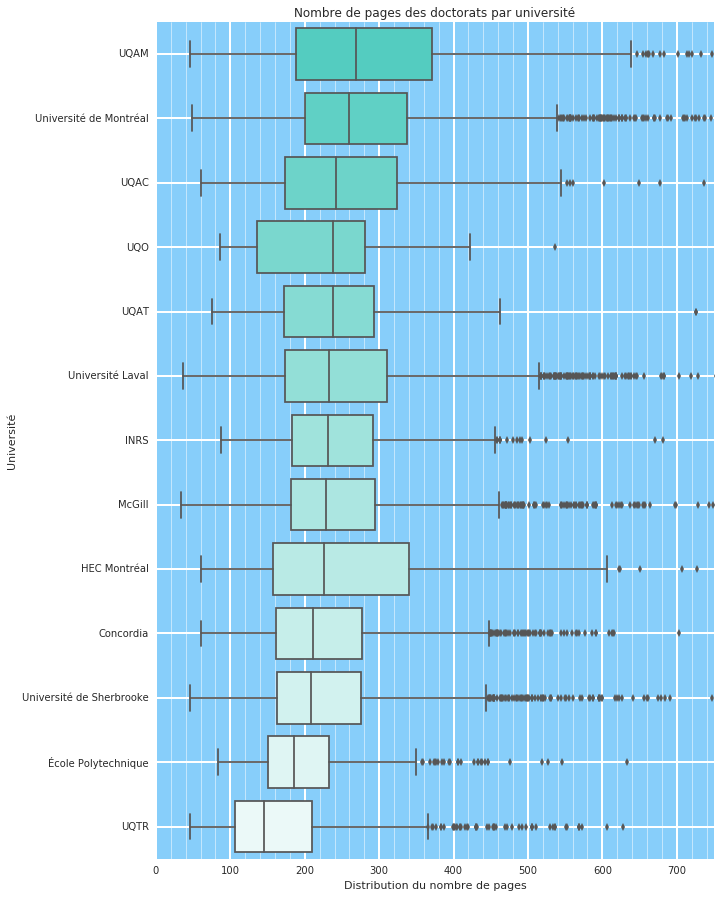

In [8]:
sns.set()
plt.figure(figsize=(10, 15))
sns.set_style("darkgrid", {
        "axes.facecolor": "lightskyblue",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("turquoise", n_colors=13, reverse=True)
boiteDoc = sns.boxplot(y="universite",
                       x="nbPages",
                       data=doctorats,
                       palette=couleurs,
                       order=medianesDoctoratsUniv.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
boiteDoc.grid(b=True, which='major', color='w', linewidth=2.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=0.5)
boiteDoc.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(0,750),
             title="Nombre de pages des doctorats par université"
            )

-----
On peut aussi créer un autre graphique à moustaches intéressant en regroupant les doctorats par discipline, plutôt que par université.<br>
On commence par créer une variable qui va nous permetter d'ordonner les disciplines en fonction de la médiane du nombre de pages (`medianesDoctoratsDiscipline`).

In [9]:
doctoratsDiscipline = doctorats.groupby("discipline")
medianesDoctoratsDiscipline = doctoratsDiscipline["nbPages"].median().sort_values(ascending=False)
medianesDoctoratsDiscipline

discipline
Droit                                 459.0
Relations industrielles               420.0
Anthropologie                         410.0
Histoire                              405.0
Traduction                            394.5
Études classiques                     378.0
Cinéma                                366.0
Histoire de l'art                     363.0
Littérature                           355.0
Études slaves                         353.0
Sociologie                            350.5
Science politique                     347.0
Communication                         337.0
Études islamiques                     337.0
Pédagogie                             336.0
Études françaises                     336.0
Religion/théologie                    335.0
Gérontologie                          329.0
Aménagement/urbanisme                 326.0
Philosophie                           323.0
Études hispaniques                    316.5
Administration publique               314.0
Design               

-----
Puis on fait un diagramme par quartiles de la même façon qu'on vient de le faire avec les universités.<br>
Le résultat est un graphique complexe, mais riche en information. C'est en droit que les doctorants sont le plus prolixes, alors que les mathématiciens et statisticiens ont davantage l'habitude d'être *right to the point*.

 (0, 750),

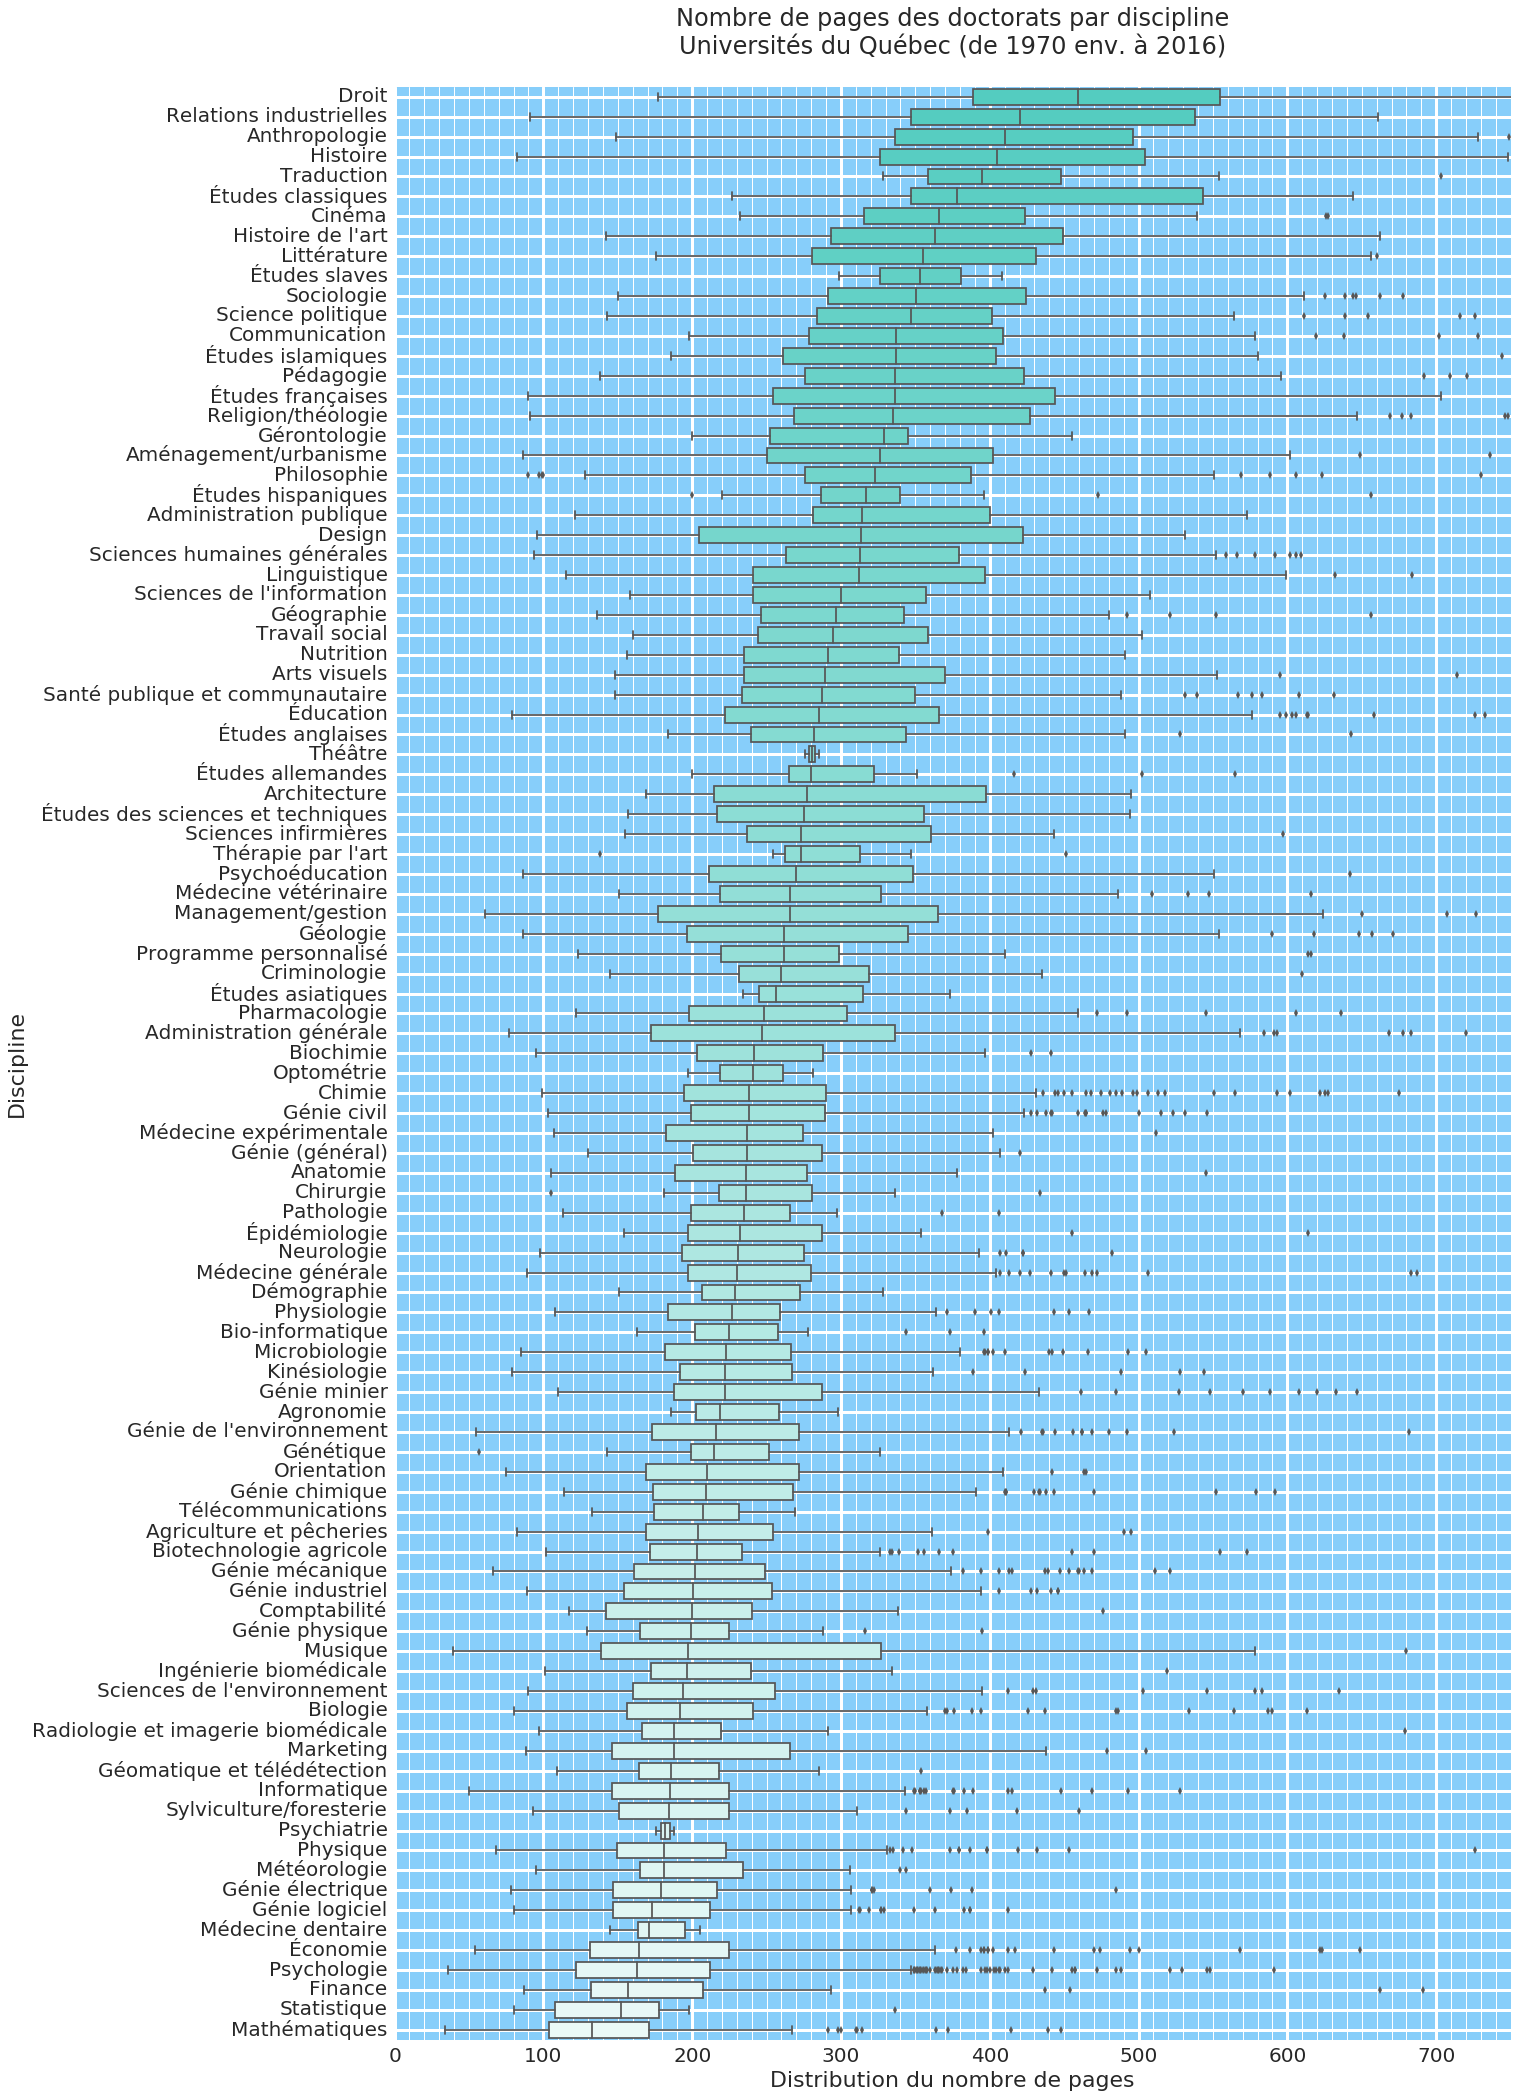

In [10]:
sns.set()
sns.set_context("poster")
sns.set(font_scale=2)
plt.figure(figsize=(20, 35))
sns.set_style("darkgrid", {
        "axes.facecolor": "lightskyblue",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("turquoise", n_colors=99, reverse=True)
boiteDoc = sns.boxplot(y="discipline",
                       x="nbPages",
                       data=doctorats,
                       palette=couleurs,
                       order=medianesDoctoratsDiscipline.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(n=10))
boiteDoc.grid(b=True, which='major', color='w', linewidth=3.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=1)
boiteDoc.set(ylabel="Discipline",
             xlabel="Distribution du nombre de pages",
             xlim=(0,750),
             title="Nombre de pages des doctorats par discipline\nUniversités du Québec (de 1970 env. à 2016)\n"
            )

-----

## Les maîtrises

-----

On peut maintenant faire la même chose pour les maîtrises en suivant exactement les mêmes étapes.

In [11]:
maitrises = theses.query("type == 'maîtrise'")
maitrises.describe()

,annee,nbPages,longTitre
count,43541.000000,43541.000000,43541.000000
mean,2005.204244,134.424313,100.840128
std,9.199370,55.511239,39.285272
min,1965.000000,19.000000,4.000000
25%,2002.000000,98.000000,73.000000
50%,2008.000000,125.000000,96.000000
75%,2012.000000,159.000000,124.000000
max,2016.000000,776.000000,345.000000


In [12]:
maitrisesUniv = maitrises.groupby("universite")
maitrisesUniv.describe()

annee    longTitre      nbPages
universite                                                           
Concordia                count  7635.000000  7635.000000  7635.000000
                         mean   2003.431958    82.973674   126.218730
                         std       8.682396    33.049842    50.820773
                         min    1967.000000     4.000000    19.000000
                         25%    1998.000000    61.000000    93.000000
                         50%    2005.000000    80.000000   117.000000
                         75%    2010.000000   103.000000   149.000000
                         max    2016.000000   298.000000   666.000000
HEC Montréal             count  2752.000000  2752.000000  2752.000000
                         mean   2004.394985    98.805596   148.677326
                         std       6.261178    35.595852    69.273289
                         min    1981.000000    21.000000    27.000000
                         25%    2001.000000    74.000000    98.000000
                         50%    2005.000000    94.000000   137.000000
                         75%    2009.000000   119.000000   183.000000
                         max    2015.000000   289.000000   671.000000
INRS                     count   918.000000   918.000000   918.000000
                         mean   2004.844227   117.749455   138.529412
                         std       8.143527    37.944952    60.024393
                         min    1980.000000    39.000000    46.000000
                         25%    2002.000000    89.000000    99.250000
                         50%    2006.000000   114.000000   126.000000
                         75%    2011.000000   141.000000   162.000000
                         max    2016.000000   259.000000   776.000000
McGill                   count  4707.000000  4707.000000  4707.000000
                         mean   1995.230083    83.101763   124.154238
                         std      14.022353    33.238671    48.615717
                         min    1966.000000     9.000000    27.000000
                         25%    1985.000000    59.000000    94.000000
                         50%    1997.000000    78.000000   115.000000
...                                     ...          ...          ...
Université Laval         std       3.094363    39.890720    53.539320
                         min    2003.000000     6.000000    26.000000
                         25%    2008.000000    82.000000    93.500000
                         50%    2010.000000   106.000000   120.000000
                         75%    2013.000000   133.000000   153.000000
                         max    2016.000000   345.000000   743.000000
Université de Montréal   count  5473.000000  5473.000000  5473.000000
                         mean   2009.435593   105.431573   134.880322
                         std       4.978674    36.490893    48.302509
                         min    1976.000000    13.000000    25.000000
                         25%    2008.000000    79.000000   104.000000
                         50%    2010.000000   103.000000   128.000000
                         75%    2013.000000   129.000000   157.000000
                         max    2015.000000   288.000000   541.000000
Université de Sherbrooke count  4749.000000  4749.000000  4749.000000
                         mean   2005.481154   110.097915   140.593178
                         std       7.199638    39.911442    55.388997
                         min    1965.000000    14.000000    30.000000
                         25%    2000.000000    82.000000   104.000000
                         50%    2006.000000   106.000000   130.000000
                         75%    2011.000000   133.000000   166.000000
                         max    2016.000000   305.000000   712.000000
École Polytechnique      count  1046.000000  1046.000000  1046.000000
                         mean   2012.322180    99.830784   135.810707
                         std       1.838042    3

In [13]:
medianesMaitrisesUniv = maitrises.groupby("universite")["nbPages"].median().sort_values(ascending=False)
medianesMaitrisesUniv

universite
UQAC                        148.0
HEC Montréal                137.0
UQAT                        135.0
UQAM                        135.0
Université de Sherbrooke    130.0
Université de Montréal      128.0
INRS                        126.0
École Polytechnique         123.5
Université Laval            120.0
UQTR                        119.5
Concordia                   117.0
UQO                         116.0
McGill                      115.0
Name: nbPages, dtype: float64

 (0, 350),

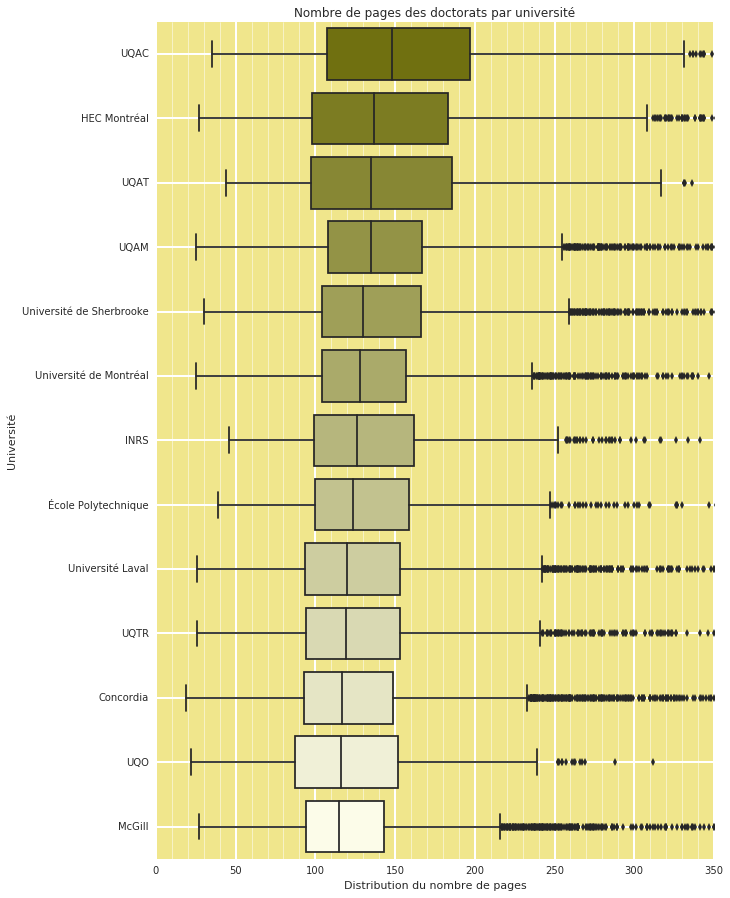

In [14]:
sns.set()
plt.figure(figsize=(10, 15))
sns.set_style("darkgrid", {
        "axes.facecolor": "khaki",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("olive", n_colors=13, reverse=True)
boiteDoc = sns.boxplot(y="universite",
                       x="nbPages",
                       data=maitrises,
                       palette=couleurs,
                       order=medianesMaitrisesUniv.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
boiteDoc.grid(b=True, which='major', color='w', linewidth=2.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=0.5)
boiteDoc.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(0,350),
             title="Nombre de pages des doctorats par université"
            )

In [15]:
medianesMaitrisesDiscipline = maitrises.groupby("discipline")["nbPages"].median().sort_values(ascending=False)
medianesMaitrisesDiscipline

discipline
Design                               179.0
Danse                                176.0
Aménagement/urbanisme                165.0
Management/gestion                   162.0
Droit                                162.0
Sciences infirmières                 158.0
Génie (général)                      157.0
Gérontologie                         157.0
Anthropologie                        154.0
Relations industrielles              152.0
Architecture                         149.0
Génie civil                          149.0
Travail social                       147.0
Études slaves                        147.0
Sociologie                           146.0
Sciences humaines générales          145.0
Histoire                             145.0
Géographie                           144.0
Sciences de l'information            143.0
Pédagogie                            142.5
Génie minier                         141.0
Histoire de l'art                    139.0
Géologie                             138.0


 (0, 350),

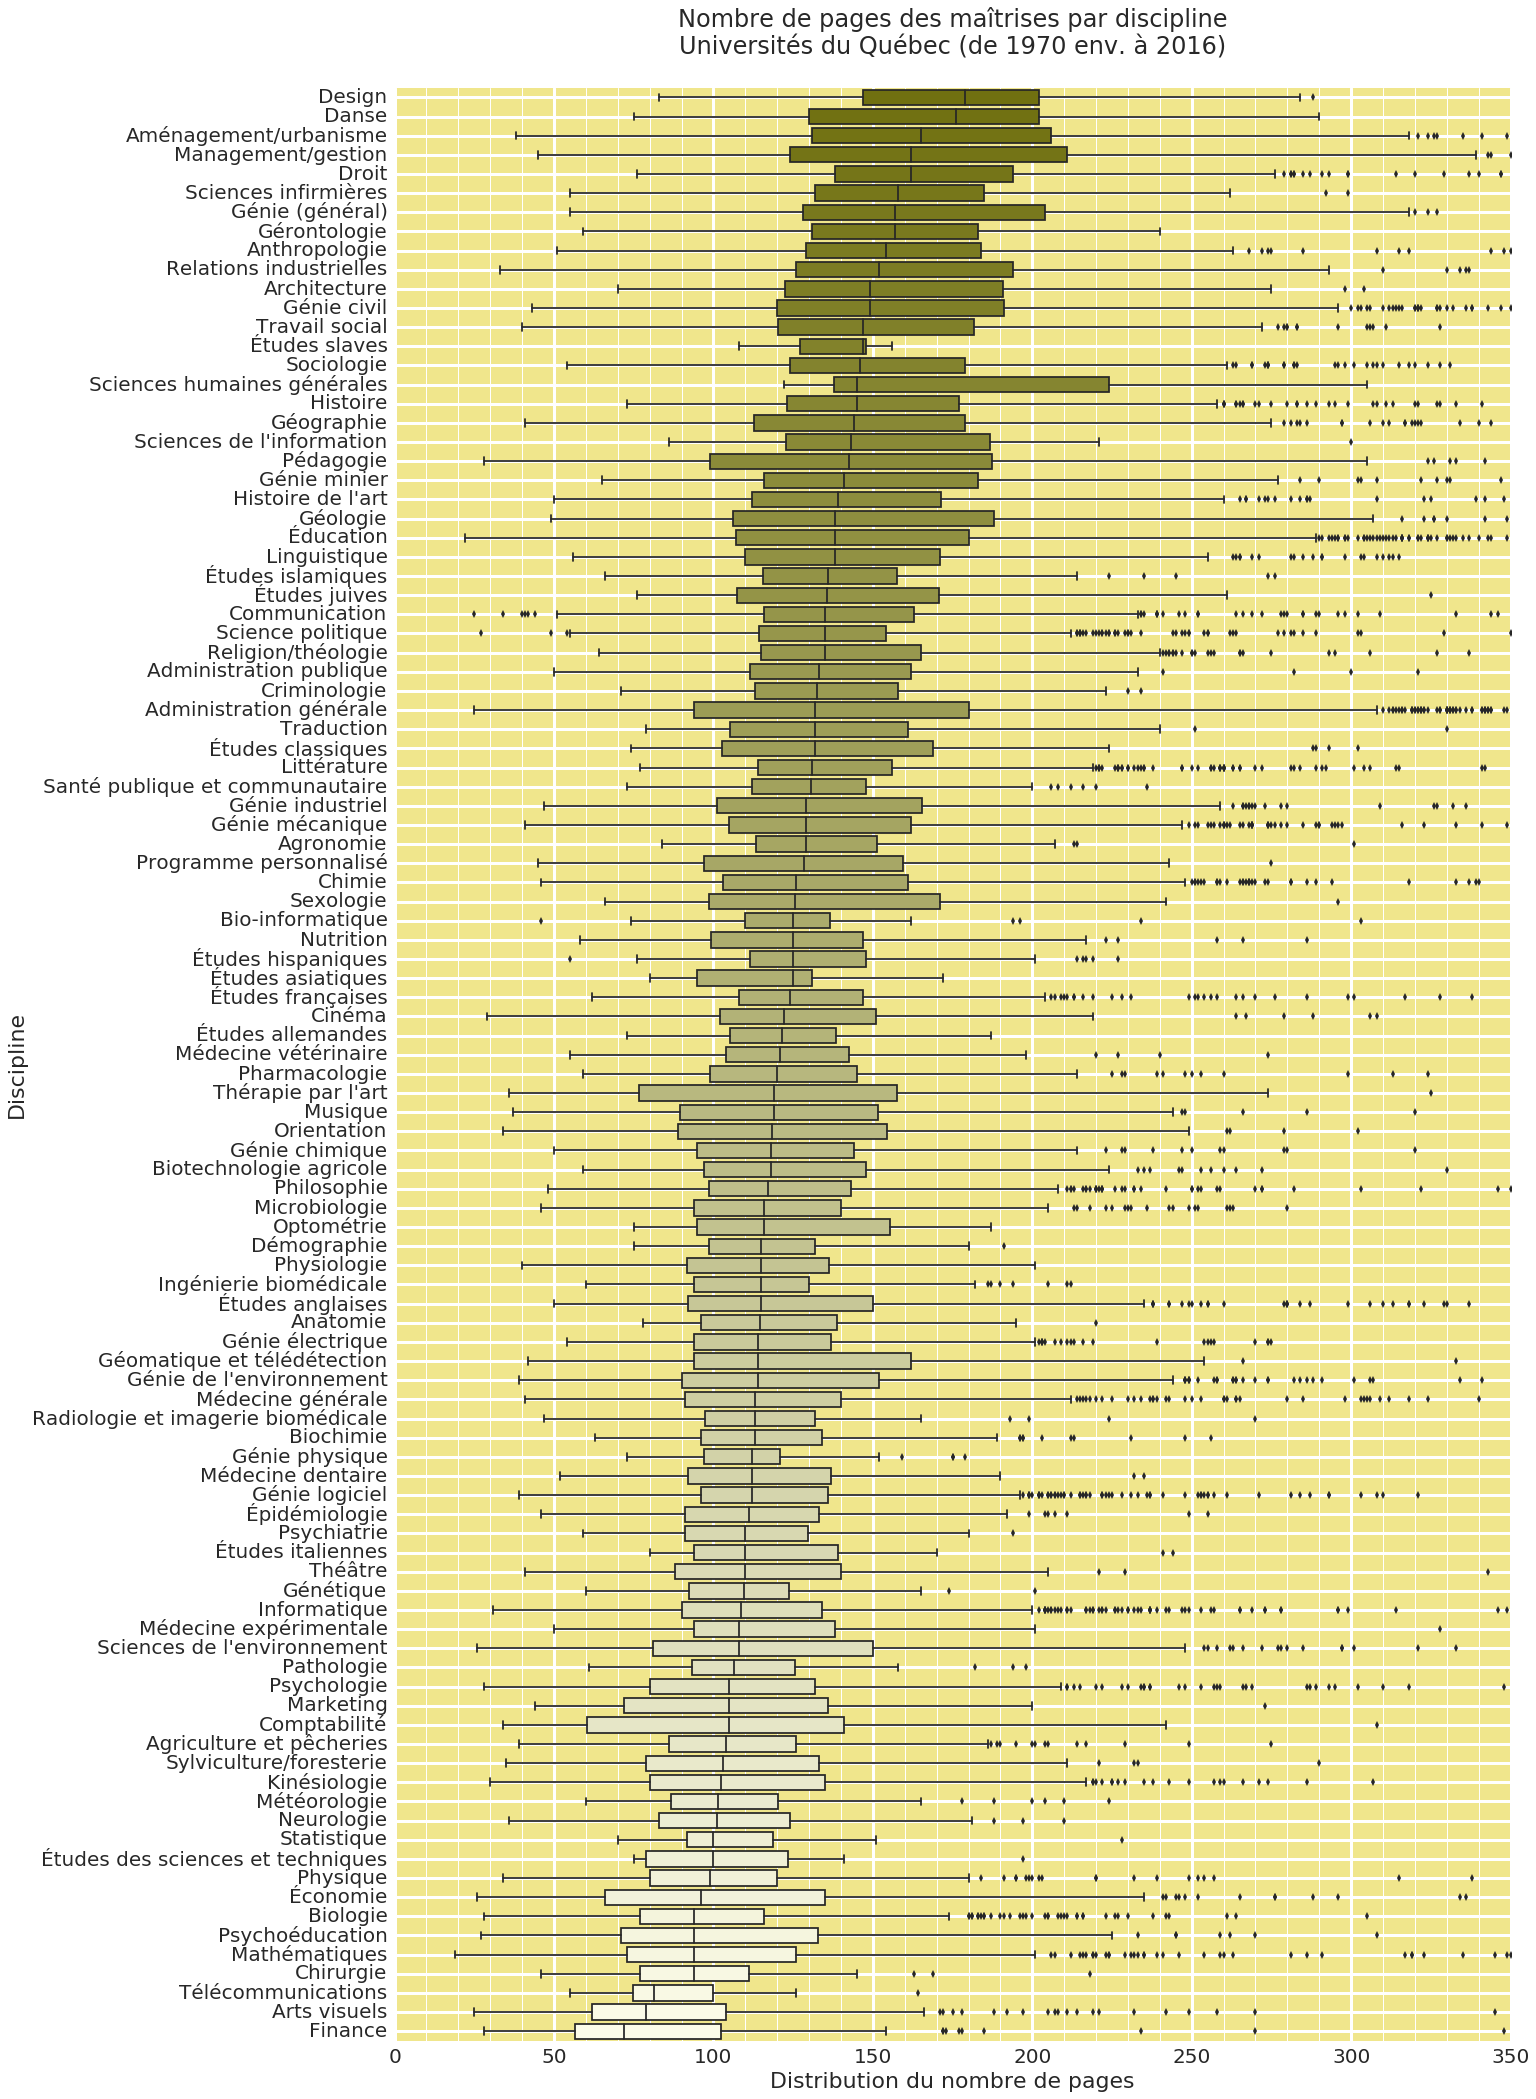

In [16]:
sns.set()
sns.set_context("poster")
sns.set(font_scale=2)
plt.figure(figsize=(20, 35))
sns.set_style("darkgrid", {
        "axes.facecolor": "khaki",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("olive", n_colors=102, reverse=True)
boiteMait = sns.boxplot(y="discipline",
                       x="nbPages",
                       data=maitrises,
                       palette=couleurs,
                       order=medianesMaitrisesDiscipline.index
                      )
boiteMait.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(n=5))
boiteMait.grid(b=True, which='major', color='w', linewidth=3.0)
boiteMait.grid(b=True, which='minor', color='w', linewidth=1)
boiteMait.set(ylabel="Discipline",
             xlabel="Distribution du nombre de pages",
             xlim=(0,350),
             title="Nombre de pages des maîtrises par discipline\nUniversités du Québec (de 1970 env. à 2016)\n"
            )

-----
### Un dernier graphique, juste pour le kik

Seaborn permet aussi de tracer des graphiques en forme de violon, ou *violin&nbsp;plots*. Cela ressemble à des diagrammes à moustaches, sauf qu'on n'y découpe pas la matière en quartiles. On y donne plutôt un aperçu de la densité réelle de la distribution.<br>
Il est aussi possible de représenter deux catégories sur chaque violon, ce qui est parfait pour le cas qui nous intéresse, puisqu'on a justement deux catégories à représenter: les maîtrises et les doctorats. Elles sont identifiées par le paramètre `hue` de la méthode `sns.violinplot` dans le code ci-dessous.

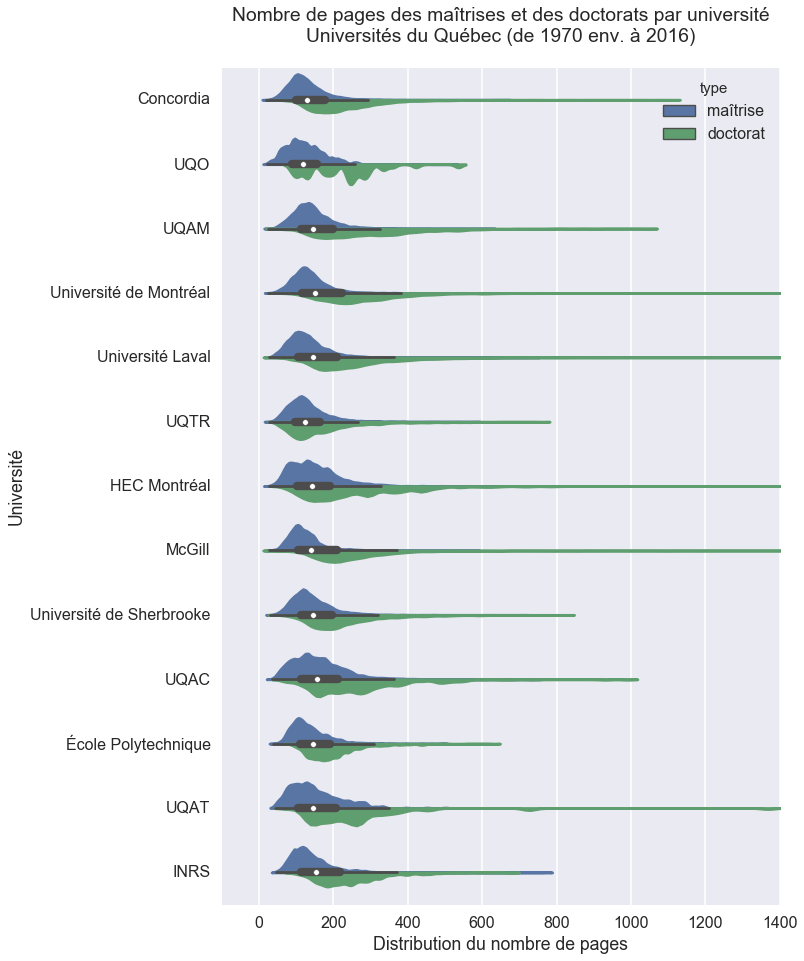

In [17]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(10, 15))
violon = sns.violinplot(y="universite", x="nbPages", data=theses, bw=.1, hue="type", split=True)
violon.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(-100,1400),
             title="Nombre de pages des maîtrises et des doctorats par université\nUniversités du Québec (de 1970 env. à 2016)\n"
            )
sns.despine()